In [1]:
import os
import sys
import re
import copy
import string
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ase.io import read

from operator import itemgetter
from itertools import groupby

0        6.786041
1        7.147286
2        6.347967
3        6.190085
4        6.478063
           ...   
66519    4.485481
66520    3.605688
66521    3.361233
66522    2.781566
66523    3.804150
Name: Heat, Length: 66524, dtype: float64

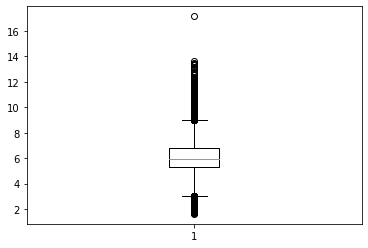

In [6]:
df = pd.read_csv('dataset/' + 'train_FillSA.csv')
#df.plot(kind = 'scatter', x = 'CO2W', y = 'Heat')
#plt.plot()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_heat=df['Heat'].dropna()

plt.boxplot(df_heat)
# Above Upper bound
# IQR = Q3 - Q1 
df_heat


In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

vol                 1556.075767
weight               893.662700
density [g/cm^3]       0.769234
SA                  1088.310000
VF                     0.142580
VV                     0.119000
ML                     2.000000
OL1                    4.000000
OL2                   14.000000
CO2/N2                12.818366
Heat                   5.267474
CO2W                  65.537205
Name: 0.25, dtype: float64
vol                 3605.836441
weight              1897.163660
density [g/cm^3]       1.192727
SA                  2693.670000
VF                     0.345120
VV                     0.443800
ML                     4.000000
OL1                   16.000000
OL2                   25.000000
CO2/N2                32.954388
Heat                   6.768299
CO2W                 163.139540
Name: 0.75, dtype: float64
vol                 2049.760674
weight              1003.500960
density [g/cm^3]       0.423494
SA                  1605.360000
VF                     0.202540
VV                

In [8]:
result_dataremove = df[~((df< (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)] #extrean outliner
result_dataremove.dropna()

<ipython-input-8-19e2d07a68df>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  result_dataremove = df[~((df< (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)] #extrean outliner
<ipython-input-8-19e2d07a68df>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  result_dataremove = df[~((df< (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)] #extrean outliner


,name,vol,weight,density [g/cm^3],SA,VF,VV,FG,ML,OL1,OL2,TP,CO2/N2,Heat,CO2W
0,mof_unit_1,1116.667429,875.240600,1.301526,1281.139152,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
1,mof_unit_2,2769.503842,2211.697211,1.326090,603.610000,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774
2,mof_unit_3,1089.818728,773.687960,1.178856,788.500000,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
3,mof_unit_4,2205.198301,1304.638720,0.982408,1441.530000,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004
4,mof_unit_5,1137.800963,901.736120,1.316020,645.692672,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66514,mof_unit_66515,7458.847904,2383.865127,0.530712,3625.060000,0.54382,1.0247,Et-F,3,4,23,nbo,4.248572,3.794780,5.125462
66515,mof_unit_66516,4427.983349,1960.711440,0.735287,2398.380000,0.58292,0.7928,NH2-I,3,7,17,pcu,5.266464,3.758129,6.346203
66518,mof_unit_66519,3763.103252,979.228920,0.432103,5154.420000,0.60648,1.4035,NO2,3,6,25,pcu,4.894371,3.400658,-4.211103
66519,mof_unit_66520,1426.479810,1272.451540,1.481238,1343.620000,0.30190,0.2038,Me-I,3,12,21,pcu,5.867674,4.485481,7.602105


In [9]:
result_dataremove2 = df[~((df< (Q1 - 1.5* IQR)) |(df > (Q3 + 1.5* IQR))).any(axis=1)] #remove outliner
result_dataremove2

<ipython-input-9-7f4227fe572a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  result_dataremove2 = df[~((df< (Q1 - 1.5* IQR)) |(df > (Q3 + 1.5* IQR))).any(axis=1)] #remove outliner
<ipython-input-9-7f4227fe572a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  result_dataremove2 = df[~((df< (Q1 - 1.5* IQR)) |(df > (Q3 + 1.5* IQR))).any(axis=1)] #remove outliner


,name,vol,weight,density [g/cm^3],SA,VF,VV,FG,ML,OL1,OL2,TP,CO2/N2,Heat,CO2W
0,mof_unit_1,1116.667429,875.240600,1.301526,1281.139152,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
2,mof_unit_3,1089.818728,773.687960,1.178856,788.500000,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
4,mof_unit_5,1137.800963,901.736120,1.316020,645.692672,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001
7,mof_unit_8,916.043907,639.111560,1.158537,1685.580000,0.28458,0.2456,Br,2,5,13,pcu,12.684804,5.234732,58.989774
8,mof_unit_9,2228.882339,1422.691820,1.059920,1458.020000,0.24277,0.2291,HCO,4,14,19,acs,37.040424,6.298964,135.587108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68605,mof_unit_68606,2112.326167,1977.492080,1.554544,433.562185,0.00000,0.0000,OPr,4,14,14,acs,3.233981,NaN,-7.204436
68606,mof_unit_68607,949.067112,753.787520,1.318868,667.965735,0.00000,0.0000,Pr,2,10,18,pcu,0.000000,NaN,-9.124771
68607,mof_unit_68608,1202.182553,1042.538240,1.440028,28.275759,0.00000,0.0000,Ph-Cl,3,12,24,pcu,0.000000,NaN,-10.954315
68608,mof_unit_68609,1188.302573,1001.700216,1.399781,1645.811949,0.00000,0.0000,Pr-F,3,4,24,pcu,24.131770,NaN,-12.943652


In [14]:
dfx=result_dataremove2.dropna()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=76bcdf0e-c1a6-4387-bffa-9e411aa48f00' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [15]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Normalization 

from tensorflow import keras
from tensorflow.keras import layers

In [16]:
dfx=dfx.dropna()

In [17]:
dfx

,name,vol,weight,density [g/cm^3],SA,VF,VV,FG,ML,OL1,OL2,TP,CO2/N2,Heat,CO2W
0,mof_unit_1,1116.667429,875.240600,1.301526,1281.139152,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
2,mof_unit_3,1089.818728,773.687960,1.178856,788.500000,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
4,mof_unit_5,1137.800963,901.736120,1.316020,645.692672,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001
7,mof_unit_8,916.043907,639.111560,1.158537,1685.580000,0.28458,0.2456,Br,2,5,13,pcu,12.684804,5.234732,58.989774
8,mof_unit_9,2228.882339,1422.691820,1.059920,1458.020000,0.24277,0.2291,HCO,4,14,19,acs,37.040424,6.298964,135.587108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66492,mof_unit_66493,4465.403359,1612.781040,0.599741,3723.430000,0.53558,0.8930,NH2-OH,1,11,15,pcu,4.141905,3.850195,4.640137
66506,mof_unit_66507,1185.303201,950.936160,1.332206,1292.340000,0.25262,0.1896,COOH-Br,2,12,19,pcu,7.851065,4.379991,7.483415
66509,mof_unit_66510,2877.936283,1696.658166,0.978955,2056.300000,0.47765,0.4879,F-I,3,8,14,pcu,7.379664,4.309148,5.968178
66515,mof_unit_66516,4427.983349,1960.711440,0.735287,2398.380000,0.58292,0.7928,NH2-I,3,7,17,pcu,5.266464,3.758129,6.346203


In [25]:
dfx.columns

Index(['name', 'vol', 'weight', 'density [g/cm^3]', 'SA', 'VF', 'VV', 'FG',
       'ML', 'OL1', 'OL2', 'TP', 'CO2/N2', 'Heat', 'CO2W'],
      dtype='object')

In [26]:
y=dfx['CO2W']

In [28]:
dfx=dfx.drop(columns=['density [g/cm^3]','name','OL1','OL2','FG','TP','CO2/N2','CO2W'])

In [29]:
dfx

,vol,weight,SA,VF,VV,ML,Heat
0,1116.667429,875.240600,1281.139152,0.07899,0.0607,3,6.786041
2,1089.818728,773.687960,788.500000,0.14874,0.1262,2,6.347967
4,1137.800963,901.736120,645.692672,0.07778,0.0591,2,6.478063
7,916.043907,639.111560,1685.580000,0.28458,0.2456,2,5.234732
8,2228.882339,1422.691820,1458.020000,0.24277,0.2291,4,6.298964
...,...,...,...,...,...,...,...
66492,4465.403359,1612.781040,3723.430000,0.53558,0.8930,1,3.850195
66506,1185.303201,950.936160,1292.340000,0.25262,0.1896,2,4.379991
66509,2877.936283,1696.658166,2056.300000,0.47765,0.4879,3,4.309148
66515,4427.983349,1960.711440,2398.380000,0.58292,0.7928,3,3.758129


In [30]:
from sklearn.preprocessing import MinMaxScaler as Scaler
sc = Scaler()
x_train_normalize = dfx.astype('float64')
X_sc_train = sc.fit_transform(x_train_normalize)



In [33]:
dfx  =X_sc_train

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(7, kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
#model.add(tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
#model.add(tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dense(1,kernel_initializer='normal',activation='linear'))

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),loss = tf.keras.losses.MeanSquaredLogarithmicError(),metrics=['MeanSquaredLogarithmicError'])

In [36]:
history = model.fit(x=dfx,y=y,epochs = 100,validation_split = 0.3)

Epoch 1/100
855/855 [==============================] - 3s 2ms/step - loss: 4.1021 - mean_squared_logarithmic_error: 4.1021 - val_loss: 1.3898 - val_mean_squared_logarithmic_error: 1.3898
Epoch 2/100
855/855 [==============================] - 2s 2ms/step - loss: 0.2783 - mean_squared_logarithmic_error: 0.2783 - val_loss: 1.4283 - val_mean_squared_logarithmic_error: 1.4283
Epoch 3/100
855/855 [==============================] - 2s 2ms/step - loss: 0.2330 - mean_squared_logarithmic_error: 0.2330 - val_loss: 1.2703 - val_mean_squared_logarithmic_error: 1.2703
Epoch 4/100
855/855 [==============================] - 2s 2ms/step - loss: 0.1755 - mean_squared_logarithmic_error: 0.1755 - val_loss: 0.9502 - val_mean_squared_logarithmic_error: 0.9502
Epoch 5/100
855/855 [==============================] - 2s 2ms/step - loss: 0.1257 - mean_squared_logarithmic_error: 0.1257 - val_loss: 0.6589 - val_mean_squared_logarithmic_error: 0.6589
Epoch 6/100
855/855 [==============================] - 2s 2ms/ste

855/855 [==============================] - 2s 2ms/step - loss: 0.0921 - mean_squared_logarithmic_error: 0.0921 - val_loss: 0.4559 - val_mean_squared_logarithmic_error: 0.4559
Epoch 45/100
855/855 [==============================] - 2s 2ms/step - loss: 0.0919 - mean_squared_logarithmic_error: 0.0919 - val_loss: 0.4505 - val_mean_squared_logarithmic_error: 0.4505
Epoch 46/100
855/855 [==============================] - 2s 2ms/step - loss: 0.0917 - mean_squared_logarithmic_error: 0.0917 - val_loss: 0.4610 - val_mean_squared_logarithmic_error: 0.4610
Epoch 47/100
855/855 [==============================] - 2s 2ms/step - loss: 0.0915 - mean_squared_logarithmic_error: 0.0915 - val_loss: 0.4727 - val_mean_squared_logarithmic_error: 0.4727
Epoch 48/100
855/855 [==============================] - 2s 2ms/step - loss: 0.0914 - mean_squared_logarithmic_error: 0.0914 - val_loss: 0.4781 - val_mean_squared_logarithmic_error: 0.4781
Epoch 49/100
855/855 [==============================] - 2s 2ms/step - los

Epoch 88/100
855/855 [==============================] - 2s 2ms/step - loss: 0.0790 - mean_squared_logarithmic_error: 0.0790 - val_loss: 0.6969 - val_mean_squared_logarithmic_error: 0.6969
Epoch 89/100
855/855 [==============================] - 2s 2ms/step - loss: 0.0786 - mean_squared_logarithmic_error: 0.0786 - val_loss: 0.6988 - val_mean_squared_logarithmic_error: 0.6988
Epoch 90/100
855/855 [==============================] - 2s 2ms/step - loss: 0.0782 - mean_squared_logarithmic_error: 0.0782 - val_loss: 0.6717 - val_mean_squared_logarithmic_error: 0.6717
Epoch 91/100
855/855 [==============================] - 2s 2ms/step - loss: 0.0780 - mean_squared_logarithmic_error: 0.0780 - val_loss: 0.6942 - val_mean_squared_logarithmic_error: 0.6942
Epoch 92/100
855/855 [==============================] - 2s 2ms/step - loss: 0.0777 - mean_squared_logarithmic_error: 0.0777 - val_loss: 0.6990 - val_mean_squared_logarithmic_error: 0.6990
Epoch 93/100
855/855 [==============================] - 2s 2

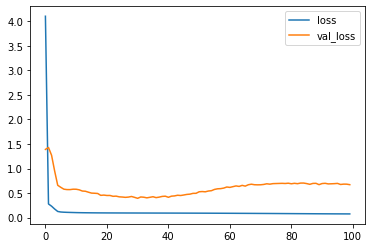

In [37]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

In [38]:
model.predict(dfx[0:10])

array([[118.432335],
       [140.23785 ],
       [105.1969  ],
       [ 74.05436 ],
       [131.01094 ],
       [ 84.13255 ],
       [ 61.01219 ],
       [167.42207 ],
       [ 74.035034],
       [ 75.694046]], dtype=float32)

In [39]:
y.head(10)

0     105.284502
2     118.987011
4      79.210001
7      58.989774
8     135.587108
9      59.739057
12     79.919170
13    133.371121
14     62.327622
18     60.050886
Name: CO2W, dtype: float64

In [41]:
pre = pd.read_csv('dataset/''pretest.csv')

In [42]:
pre.columns

Index(['MOFname', 'volume [A^3]', 'weight [u]', 'surface_area [m^2/g]',
       'void_fraction', 'void_volume [cm^3/g]', 'functional_groups',
       'metal_linker', 'organic_linker1', 'organic_linker2', 'topology',
       'CO2/N2_selectivity', 'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'],
      dtype='object')

In [43]:
prex=pre.drop(columns=['MOFname', 'functional_groups','organic_linker1', 'organic_linker2', 'topology','CO2/N2_selectivity' ])

In [44]:
prex.head()

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]
0,6288.293858,2271.68714,4148.48,0.41225,0.6872,4,5.604779
1,1790.506437,887.74732,2191.34,0.30231,0.3672,2,6.148776
2,2348.969203,1239.76588,2030.88,0.28533,0.3256,3,6.164397
3,2941.571525,1147.95140,3587.13,0.41963,0.6475,2,5.164957
4,705.397601,643.27074,0.00,0.07060,0.0466,3,7.090687


In [55]:
sc = Scaler()
x_test_normalize = prex.astype('float64')
X_sc_test = sc.fit_transform(x_test_normalize)

In [65]:
y_pred=model.predict(X_sc_test)

In [66]:
lookname = pd.read_csv('dataset/train.csv')

In [67]:
lookname.columns

Index(['MOFname', 'volume [A^3]', 'weight [u]', 'surface_area [m^2/g]',
       'void_fraction', 'void_volume [cm^3/g]', 'functional_groups',
       'metal_linker', 'organic_linker1', 'organic_linker2', 'topology',
       'CO2/N2_selectivity', 'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
       'CO2_working_capacity [mL/g]'],
      dtype='object')

In [68]:
y_pred=pd.DataFrame(y_pred,columns=['CO2_working_capacity [mL/g]'])

In [71]:
y_pred.to_csv("Normalize_submission.csv")

In [72]:
pre_data = pd.concat([pre, y_pred], axis=1)

In [73]:
pre_data

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
0,mof_unit_pretest_1,6288.293858,2271.687140,4148.48,0.41225,0.6872,OPr,4,7,27,acs,14.048791,5.604779,107.519440
1,mof_unit_pretest_2,1790.506437,887.747320,2191.34,0.30231,0.3672,HCO-OPr,2,4,26,pcu,20.217222,6.148776,136.000168
2,mof_unit_pretest_3,2348.969203,1239.765880,2030.88,0.28533,0.3256,SO3H-OH,3,18,22,pcu,33.108662,6.164397,129.169998
3,mof_unit_pretest_4,2941.571525,1147.951400,3587.13,0.41963,0.6475,Et-OH,2,8,15,pcu,12.800562,5.164957,95.187790
4,mof_unit_pretest_5,705.397601,643.270740,0.00,0.07060,0.0466,Cl-H,3,10,22,pcu,23.395617,7.090687,89.424866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,mof_unit_pretest_1996,5111.109714,1578.082220,3630.31,0.58981,1.1504,COOH-NH2,2,1,14,nbo,4.778698,3.675003,49.896049
1996,mof_unit_pretest_1997,911.269336,481.279680,2546.02,0.36132,0.4120,CN-H,2,10,20,pcu,6.883387,3.732121,48.446831
1997,mof_unit_pretest_1998,4236.596494,1127.792600,4296.42,0.60298,1.3641,HCO-NH2,2,7,20,pcu,5.270734,3.354425,43.198387
1998,mof_unit_pretest_1999,22861.645381,3492.712720,6252.01,0.75732,2.9852,Me-OH,2,6,11,nbo,3.172914,2.643592,35.244278


In [74]:
pre_data.to_csv("Normalize_submission.csv")